In [2]:
'''Use Autoencoder to implement anomaly detection. Build the model by using:
a. Import required libraries
b. Upload / access the dataset
c. Encoder converts it into latent representation
d. Decoder networks convert it back to the original input
e. Compile the models with Optimizer, Loss, and Evaluation Metrics'''

'Use Autoencoder to implement anomaly detection. Build the model by using:\na. Import required libraries\nb. Upload / access the dataset\nc. Encoder converts it into latent representation\nd. Decoder networks convert it back to the original input\ne. Compile the models with Optimizer, Loss, and Evaluation Metrics'

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler # by removing the mean and scaling them to unit variance.
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score #evaluate the model’s performance on anomaly detection.


RANDOM_SEED = 2021 #This sets a seed for random number generation to ensure reproducibility.
TEST_PCT = 0.3 #the percentage of the dataset allocated for testing.
LABELS = ["Normal","Fraud"]

#This list provides labels for the classes in the dataset. 0 represents a normal transaction, and 1 represents fraud.

In [4]:
dataset = pd.read_csv("creditcard.csv")

In [ ]:
#check for any null values
print("Any nulls in the dataset",dataset.isnull().values.any()) #see if it contains any null values
print('-------')
print("No. of unique labels",len(dataset['Class'].unique())) # This retrieves the unique values in the Class column of the dataset.
print("Label values",dataset.Class.unique()) # calculates the total number of unique labels in the Class column.

#0 is for normal credit card transcation
#1 is for fraudulent credit card transcation
print('-------')
print("Break down of Normal and Fraud Transcations")
print(pd.value_counts(dataset['Class'],sort=True)) # counts occurrences of each unique value in the Class column, which will show the distribution between normal and fraudulent transactions.

Any nulls in the dataset False
-------
No. of unique labels 2
Label values [0 1]
-------
Break down of Normal and Fraud Transcations
0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Number of Observations')

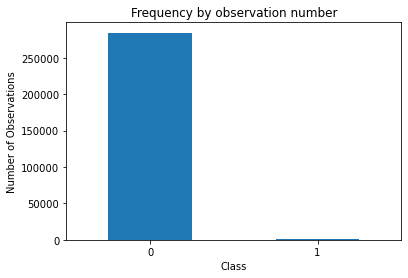

In [ ]:
#visualizing the imbalanced dataset
count_classes = pd.value_counts(dataset['Class'],sort=True) #calculate the count of each unique class
count_classes.plot(kind='bar',rot=0) # we create a bar chart showing the number of observations for each class.
plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique())
#plt.xticks() customizes the labels on the x-axis
#generates a sequence representing each unique class
#retrieves the actual unique values in the Class column (normal and fraud labels), which are used as labels on the x-axis.

plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

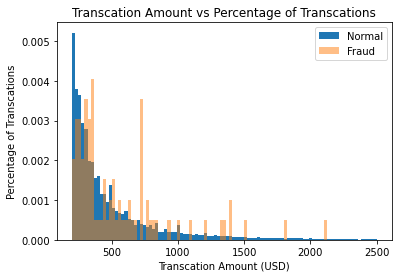

In [ ]:
#Save the normal and fradulent transcations in seperate dataframe
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]

#Visualize transcation amounts for normal and fraudulent transcations
#Plots transaction amounts for both normal and fraud transactions using plt.hist().
bins = np.linspace(200,2500,100) #Ranges from 200 to 2500 in 100 intervals
plt.hist(normal_dataset.Amount,bins=bins,alpha=1,density=True,label='Normal') #alpha Sets transparency, density=True: Normalizes counts for percentage comparison.
plt.hist(fraud_dataset.Amount,bins=bins,alpha=0.5,density=True,label='Fraud')
plt.legend(loc='upper right')
plt.title("Transcation Amount vs Percentage of Transcations")
plt.xlabel("Transcation Amount (USD)")
plt.ylabel("Percentage of Transcations")
plt.show()

#Displays the histogram, comparing transaction amount distributions for normal vs. fraud transactions.

In [8]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#standardizes features by removing the mean and scaling to unit variance, 
# which helps neural networks learn more effectively.

sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1,1))
#Standardizes the Amount column by fitting a scaler to it and transforming it to have a mean of 0 and variance of 1.
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))
#Similarly, scales the Time column to improve learning consistency.

In [ ]:
raw_data = dataset.values
#The last element contains if the transcation is normal which is represented by 0 and if fraud then 1
labels = raw_data[:,-1]

#The other data points are the electrocadriogram data
data = raw_data[:,0:-1]

train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size = 0.2,random_state =2021)
# Splits data and labels into training and test sets (80% training, 20% testing) with a fixed random state for reproducibility

In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data,tf.float32)
test_data = tf.cast(test_data,tf.float32)

#This code normalizes the train_data and test_data to a 0-1 range
#  and converts them to a float32 type

In [ ]:
#The code splits the dataset into two categories: normal and fraud, 
# based on the train_labels and test_labels. 
# It creates separate datasets for normal and fraud transactions in both the training and testing sets. 
# The boolean conversion ensures True represents fraud and False represents normal. 
# Finally, it prints the number of records in each category (fraud and normal) for both training and testing data.


train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Creating normal and fraud datasets
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]

fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print("No. of records in Fraud Train Data=",len(fraud_train_data))
print("No. of records in Normal Train Data=",len(normal_train_data))
print("No. of records in Fraud Test Data=",len(fraud_test_data))
print("No. of records in Normal Test Data=",len(normal_test_data))

No. of records in Fraud Train Data= 389
No. of records in Normal Train Data= 227456
No. of records in Fraud Test Data= 103
No. of records in Normal Test Data= 56859


In [ ]:
#nb_epoch = 50: Specifies the number of epochs (iterations over the entire dataset) to train the model. The model will be trained for 50 epochs.

#batch_size = 64: Defines the number of samples per batch during training. In this case, the model will update its weights after processing 64 samples at a time.

#input_dim = normal_train_data.shape[1]: Sets the input dimension to the number of features (columns) in the normal_train_data. If normal_train_data has 30 features, input_dim will be 30.

#encoding_dim = 14: Defines the dimension of the encoding space (i.e., the number of neurons in the encoding layer of the model). In this case, the encoded representation of the input data will have 14 features.

#hidden_dim1 = int(encoding_dim / 2): Sets the size of the first hidden layer to half of the encoding dimension. This means hidden_dim1 will be 7 (half of 14).

#hidden_dim2 = 4: Defines the size of the second hidden layer as 4 neurons.

#learning_rate = 1e-7: Sets the learning rate for the optimizer. A very small learning rate of 1e-7 suggests a slower but more precise training process, which may help avoid overshooting the optimal solution.

nb_epoch = 50
batch_size = 64
input_dim = normal_train_data.shape[1]
#num of columns,30
encoding_dim = 14
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = 4
learning_rate = 1e-7

In [ ]:
#input layer 
# Input Layer: Accepts input data with a shape of (input_dim,) (number of features)
input_layer = tf.keras.layers.Input(shape=(input_dim,))

#Encoder
#Encoder: Reduces the input dimension step-by-step using dense layers with activations like tanh, ReLU, and Leaky ReLU. It also uses Dropout (20%) to prevent overfitting and L2 regularization.
encoder = tf.keras.layers.Dense(encoding_dim,activation="tanh",activity_regularizer = tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim2,activation=tf.nn.leaky_relu)(encoder)

#Decoder
# Decoder: Expands the encoded data back to the original input dimension using dense layers with ReLU and tanh activations.

decoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim,activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim,activation='tanh')(decoder)

#Autoencoder
#Autoencoder Model: The encoder and decoder are combined into an autoencoder model for data compression and reconstruction.
autoencoder = tf.keras.Model(inputs = input_layer,outputs = decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [ ]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",mode='min',monitor='val_loss',verbose=2,save_best_only=True)
#Define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.0001,
                patience=10,
                verbose=11,
                mode='min',
                restore_best_weights=True
)
#These callbacks help prevent overfitting by stopping training early if the model stops improving and saving only the best model.

In [ ]:
autoencoder.compile(metrics=['accuracy'],loss= 'mean_squared_error',optimizer='adam')
#n summary, the model is configured for training with the Adam optimizer, mean squared error loss for reconstruction, 
# and accuracy as a metric (even though MSE would be more appropriate for this type of model).

In [ ]:
history = autoencoder.fit(normal_train_data,normal_train_data,epochs = nb_epoch,
                         batch_size = batch_size,shuffle = True,
                         validation_data = (test_data,test_data),
                         verbose=1, #Training progress will be displayed with one line per epoch, including the loss and any other metrics.
                         callbacks = [cp,early_stop]).history

#In summary, this code trains the autoencoder on normal data while monitoring the validation loss and applying early stopping to prevent overfitting. 
# The best model will be saved automatically during the process.

Epoch 1/50
3537/3554 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.0285
Epoch 1: val_loss improved from inf to 0.00002, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 11s 2ms/step - loss: 0.0041 - accuracy: 0.0286 - val_loss: 2.0743e-05 - val_accuracy: 0.0051
Epoch 2/50
3527/3554 [============================>.] - ETA: 0s - loss: 1.9675e-05 - accuracy: 0.0564
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 7s 2ms/step - loss: 1.9673e-05 - accuracy: 0.0567 - val_loss: 2.0192e-05 - val_accuracy: 0.1279
Epoch 3/50
3536/3554 [============================>.] - ETA: 0s - loss: 1.9554e-05 - accuracy: 0.0646
Epoch 3: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 7s 2ms/step - loss: 1.9549e-05 - accuracy: 0.0646 - val_loss: 2.0070e-05 - val_accuracy: 0.2168
Epoch 4/50
3534

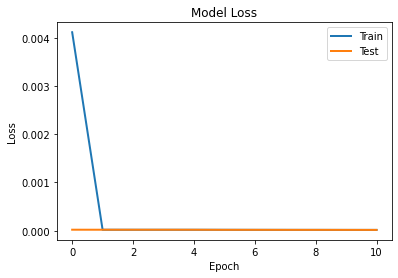

In [18]:
plt.plot(history['loss'],linewidth = 2,label = 'Train')
plt.plot(history['val_loss'],linewidth = 2,label = 'Test')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

#plt.ylim(ymin=0.70,ymax=1)

plt.show()

In [ ]:
test_x_predictions = autoencoder.predict(test_data) #The model generates predictions (reconstructed data) for the test_data by passing it through the trained autoencoder. This produces the reconstructed version of the input.
mse = np.mean(np.power(test_data - test_x_predictions, 2),axis = 1) #The reconstruction error is calculated by comparing the original test_data with the reconstructed test_x_predictions
error_df = pd.DataFrame({'Reconstruction_error':mse,
                         'True_class':test_labels})
#Reconstruction_error: The MSE for each test sample, representing how well the autoencoder was able to reconstruct the data.
#True_class: The actual class label (test_labels) for each test sample, indicating whether the sample is normal or fraud

#This DataFrame allows you to analyze the reconstruction error for each sample and compare it with its true label. 
# It's typically used in anomaly detection, where high reconstruction errors might indicate outliers (e.g., fraud cases in the context of fraud detection).

1781/1781 [==============================] - 2s 1ms/step


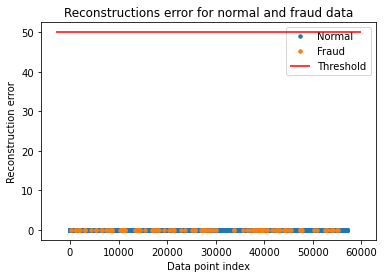

In [ ]:
threshold_fixed = 50 #A fixed threshold of 50 is set to differentiate between normal and anomalous (fraud) samples based on their reconstruction error. 
                      #Samples with errors greater than this threshold are considered anomalous.
groups = error_df.groupby('True_class')

#The error_df DataFrame is grouped by the True_class column (normal or fraud) to separate the reconstruction errors for each class. The groups will have:
#name == 0: Normal data points.
#name == 1: Fraud data points.

fig,ax = plt.subplots()

for name,group in groups:
        ax.plot(group.index,group.Reconstruction_error,marker='o',ms = 3.5,linestyle='',
                label = "Fraud" if  name==1 else "Normal")
        

#A loop iterates over the grouped data (normal and fraud):
#ax.plot(group.index, group.Reconstruction_error, ...) plots the reconstruction errors for each data point within a group.
#marker='o' places circular markers for each data point.
#ms = 3.5 specifies the size of the markers.
#he label is set to "Fraud" if the group is fraud (name == 1), or "Normal" if the group is normal (name == 0).   

ax.hlines(threshold_fixed,ax.get_xlim()[0],ax.get_xlim()[1],colors="r",zorder=100,label="Threshold")
#A horizontal line is drawn at the y-value of 50 (threshold_fixed), representing the reconstruction error threshold.
#ax.get_xlim()[0] and ax.get_xlim()[1] automatically set the x-axis limits based on the data points' indices.
ax.legend()
plt.title("Reconstructions error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

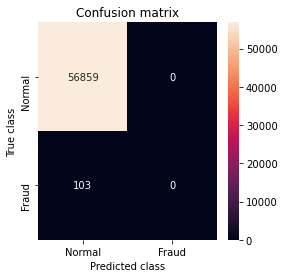

Accuracy : 0.9981917769741231
Recall : 0.0
Precision : 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#A fixed threshold of 52 is used to classify data points as fraud or normal based on their reconstruction error.
threshold_fixed = 52

#A list comprehension is used to create the list pred_y, 
# which stores the predicted class (fraud or normal) for each test sample, based on the calculated reconstruction error.
pred_y = [1 if e > threshold_fixed else 0
          for e in
        error_df.Reconstruction_error.values]

#The predicted values (pred_y) are added as a new column pred to the error_df DataFrame.
error_df['pred'] = pred_y

#The confusion matrix is computed using confusion_matrix() from sklearn.metrics, 
# comparing the true class (True_class) and the predicted class (pred_y).
conf_matrix = confusion_matrix(error_df.True_class,pred_y)

#The confusion matrix is displayed as a heatmap using Seaborn (sns.heatmap).
#The xticklabels and yticklabels are set to LABELS, which should be defined somewhere in your code (e.g., LABELS = ['Normal', 'Fraud']).
The matrix values are annotated (annot=True) and formatted as integers (fmt="d").
#plt.title(), plt.ylabel(), and plt.xlabel() add labels to the plot.
plt.figure(figsize = (4,4))
sns.heatmap(conf_matrix,xticklabels = LABELS,yticklabels = LABELS,annot = True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

#Print Accuracy,Precision and Recall
print("Accuracy :",accuracy_score(error_df['True_class'],error_df['pred']))
print("Recall :",recall_score(error_df['True_class'],error_df['pred']))
print("Precision :",precision_score(error_df['True_class'],error_df['pred']))